In [46]:
import pandas as pd
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
resultDate = "2025_12_18__21_28_23"

csvsPath = f"../src/EntityFX.MqttSimulator/EntityFX.MqttY.MqttRelay.App/bin/Release/net6.0/results/{resultDate}"

cwd = os.getcwd()

corei7 = 'core-i7.csv'
elbrus8s = 'elbrus-8s.csv'

corei7p = os.path.join(csvsPath, corei7)
elbrus8sp = os.path.join(csvsPath, elbrus8s)

df_i7 = pd.read_csv(corei7p, delimiter=';',decimal='.', encoding="utf8")
df_elbrus = pd.read_csv(elbrus8sp, delimiter=';',decimal='.', encoding="utf8")

if not os.path.isdir(resultDate):
    os.mkdir(resultDate)

In [48]:
def create_comparison_plots(df_i7, df_elbrus):
    """
    Создание сравнительных графиков для двух платформ
    """
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Общее сравнение производительности
    ax1 = plt.subplot(3, 2, 1)
    plot_performance_comparison(ax1, df_i7, df_elbrus)
    
    # 2. Эффективность параллелизации
    ax2 = plt.subplot(3, 2, 2)
    plot_parallel_efficiency(ax2, df_i7, df_elbrus)
    
    # 3. Влияние количества брокеров
    ax3 = plt.subplot(3, 2, 3)
    plot_brokers_impact(ax3, df_i7, df_elbrus)
    
    # 4. Влияние количества клиентов
    ax4 = plt.subplot(3, 2, 4)
    plot_clients_impact(ax4, df_i7, df_elbrus)
    
    # 5. Влияние длины сети
    ax5 = plt.subplot(3, 2, 5)
    plot_netlength_impact(ax5, df_i7, df_elbrus)
    
    # 6. Сравнение времени на шаг
    ax6 = plt.subplot(3, 2, 6)
    plot_step_time_comparison(ax6, df_i7, df_elbrus)
    
    plt.tight_layout()
    return fig

def plot_performance_comparison(ax, df_i7, df_elbrus):
    """
    График сравнения абсолютной производительности
    """
    # Выбираем конкретную конфигурацию для сравнения
    config = {'IsParallel': True, 'EnabledCounters': False, 'Nets': 2}
    
    # Фильтруем данные
    data_i7 = df_i7[(df_i7['IsParallel'] == config['IsParallel']) & 
                    (df_i7['EnabledCounters'] == config['EnabledCounters']) &
                    (df_i7['Nets'] == config['Nets'])]
    
    data_el = df_elbrus[(df_elbrus['IsParallel'] == config['IsParallel']) & 
                        (df_elbrus['EnabledCounters'] == config['EnabledCounters']) &
                        (df_elbrus['Nets'] == config['Nets'])]
    
    # Создаём сравнительную гистограмму
    x = np.arange(len(data_i7['Brokers'].unique()))
    width = 0.35
    
    for i, brokers in enumerate(sorted(data_i7['Brokers'].unique())):
        # Для каждого количества брокеров
        for j, clients in enumerate([3, 10, 50]):
            time_i7 = data_i7[(data_i7['Brokers'] == brokers) & 
                             (data_i7['Clients'] == clients)]['RealTime'].values[0]
            time_el = data_el[(data_el['Brokers'] == brokers) & 
                             (data_el['Clients'] == clients)]['RealTime'].values[0]
            
            # Позиции для столбцов
            pos = i * 3 + j
            
            ax.bar(pos - width/2, time_i7, width, color='blue', alpha=0.7, label='i7-2600' if pos==0 else '')
            ax.bar(pos + width/2, time_el, width, color='red', alpha=0.7, label='Эльбрус-8С' if pos==0 else '')
    
    ax.set_xlabel('Конфигурация (Brokers × Clients)')
    ax.set_ylabel('Real Time (сек)')
    ax.set_title('Сравнение производительности двух платформ')
    ax.legend()
    ax.grid(True, alpha=0.3)

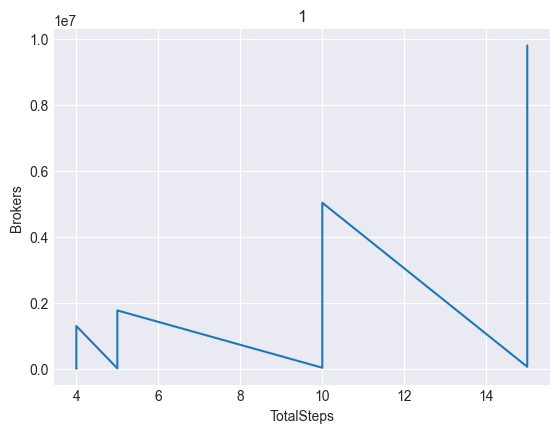

<Figure size 300x200 with 0 Axes>

In [53]:
# Преобразование данных (пример для первой строки)
import datetime


def time_to_seconds(t_str):
    # Формат: HH:MM:SS.ms
    h, m, s = t_str.split(':')
    s, ms = s.split('.')
    return int(h)*3600 + int(m)*60 + int(s) + int(ms)/100

# ... (код загрузки и преобразования данных в DataFrame df) ...

# Создание графиков
#fig, axes = plt.subplots(2, 2, figsize=(16, 12))


plt.style.use('seaborn-v0_8-darkgrid')

df = df_i7

# График 1: Влияние Parallel и Counters на Real Time (для Brokers=10, Net Length=2)
# df_sample = df[(df['Brokers']==10) & (df['Nets']==2)]
# ax = axes[0, 0]
# x = np.arange(len(df_sample['Clients'].unique()))
# width = 0.25
# for i, (par, cnt) in enumerate([(False, False), (True, False), (True, True)]):
#     subset = df_sample[(df_sample['IsParallel']==par) & (df_sample['EnabledCounters']==cnt)]
#     label = f"Par={par}, Cnt={cnt}"
#     ax.bar(x + i*width - width, subset['RealTime'], width, label=label)
# ax.set_xticks(x)
# ax.set_xticklabels(df_sample['Clients'].unique())
# ax.set_xlabel('Количество клиентов')
# ax.set_ylabel('Real Time (сек)')
# ax.set_title('Влияние IsParallel и Counters на производительность\n(Brokers=10, Net Length=2)')
# ax.legend()
# ax.grid(True, alpha=0.3)
# График 2: Влияние Clients на Real Time (Parallel=True, Counters=False)
df_sample = df[(df['Repeats']==100) & (df['Clients']==50) & (df['Nets']==2)]

fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)
ax.set_title("1")
ax.set_xlabel("TotalSteps")
ax.set_ylabel("Brokers")

plt.figure(figsize=(3, 2))#Graph size
ax.plot(df["Brokers"], df["TotalSteps"])
#fig.savefig(f"{resultDate}/{plotPictureName}")


# for net_len in df_sample['Nets'].unique():
#     subset = df_sample[df_sample['Nets'] == net_len]
#     rs=pd.to_datetime(subset['RealTime'])
#     #rs = datetime.strptime(subset['RealTime'], '%H:%M:%S')
#     ax.plot(subset['Clients'], rs, 'o-', label=f'Nets={net_len}')
# ax.set_xlabel('Количество клиентов')
# ax.set_ylabel('RealTime')
# ax.set_title('Рост времени выполнения с увеличением клиентов\n(IsParallel=True, EnabledCounters=False, Brokers=4)')
# ax.legend()
# #ax.set_yscale('log') # Логарифмическая шкала для наглядности
# ax.grid(True, alpha=0.3)

# # График 3: Влияние Brokers на Real Time (Clients=50, Parallel=True, Counters=False)
# df_sample = df[(df['Clients']==50) & (df['IsParallel']==True) & (df['EnabledCounters']==False)]
# ax = axes[1, 0]
# for net_len in sorted(df_sample['Nets'].unique()):
#     subset = df_sample[df_sample['Nets'] == net_len].sort_values('Brokers')
#     ax.plot(subset['Brokers'], subset['RealTime'], 's-', label=f'Nets={net_len}')
# ax.set_xlabel('Количество брокеров')
# ax.set_ylabel('Real Time (сек)')
# ax.set_title('Влияние количества брокеров на производительность\n(Clients=50, IsParallel=True, Counters=False)')
# ax.legend()
# ax.grid(True, alpha=0.3)

# # График 4: Корреляция Steps и Real Time
# ax = axes[1, 1]
# colors = {True: 'green', False: 'red'}
# for par in [True, False]:
#     subset = df[df['IsParallel'] == par]
#     ax.scatter(subset['Steps'], subset['RealTime'], alpha=0.6, c=colors[par], label=f'IsParallel={par}')
# ax.set_xlabel('Steps (примитивные шаги)')
# ax.set_ylabel('Real Time (сек)')
# ax.set_title('Корреляция между вычислительной сложностью и временем выполнения')
# ax.legend()
# ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

NameError: name 'plot_parallel_efficiency' is not defined

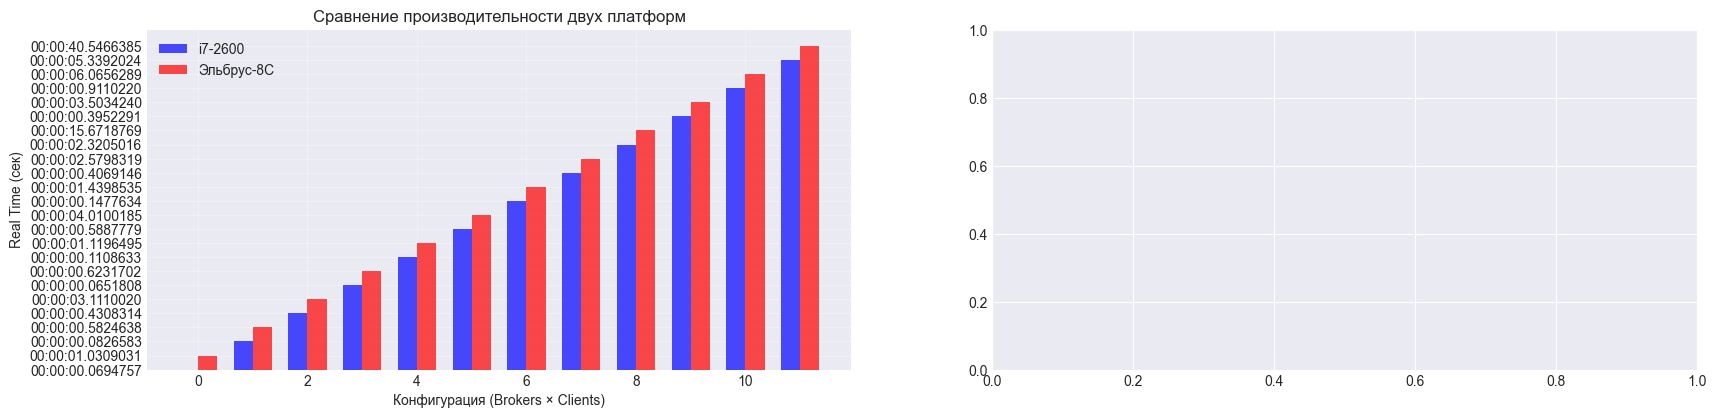

In [50]:
create_comparison_plots(df_i7, df_elbrus)